In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Dataset_Year_2019.csv')

In [3]:
df

,LOCATION,POWER,SELF-PROTECTION,Average earth discharge density DDT [Rays/km^2-año],Maximum ground discharge density DDT [Rays/km^2-año],Burning rate [Failures/year],Criticality according to previous study for ceramics level,Removable connectors,Type of clients,Number of users,Electric power not supplied EENS [kWh],Type of installation,Air network,Circuit Queue,km of network LT:,Burned transformers 2019
0,1,112.5,0,3.155602,6.6,0.00,0,1,STRATUM 2,94,1822.5,MACRO WITHOUT ANTI-FRAUD NET,1,0,0.32362,0
1,1,10.0,0,3.155602,6.6,0.00,0,1,OFFICIAL,1,270.0,MACRO WITHOUT ANTI-FRAUD NET,1,0,0.30036,0
2,1,25.0,0,3.155602,6.6,0.00,0,1,STRATUM 2,74,405.0,MACRO WITHOUT ANTI-FRAUD NET,1,0,0.29695,0
3,1,75.0,0,3.155602,6.6,0.00,0,1,STRATUM 6,30,1215.0,MACRO WITHOUT ANTI-FRAUD NET,1,0,0.12575,0
4,1,75.0,0,3.155602,6.6,0.00,0,1,STRATUM 4,24,1215.0,MACRO WITHOUT ANTI-FRAUD NET,1,1,0.16605,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15868,0,37.5,0,3.155602,6.6,0.00,0,0,STRATUM 1,30,796.5,POLE,1,0,0.80303,0
15869,0,37.5,0,4.148532,8.3,0.25,0,1,STRATUM 1,57,607.5,POLE,1,0,"146,419",0
15870,0,25.0,0,3.850980,6.1,0.00,0,0,STRATUM 1,21,855.0,POLE,1,1,0.7399,0
15871,0,10.0,0,0.717021,2.5,0.00,1,1,STRATUM 1,10,162.0,POLE,1,0,"176,708",0


In [4]:
df.shape

(15873, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15873 entries, 0 to 15872
Data columns (total 16 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   LOCATION                                                    15873 non-null  int64  
 1   POWER                                                       15873 non-null  float64
 2   SELF-PROTECTION                                             15873 non-null  int64  
 3   Average earth discharge density DDT [Rays/km^2-año]         15873 non-null  float64
 4   Maximum ground discharge density DDT [Rays/km^2-año]        15873 non-null  float64
 5   Burning rate  [Failures/year]                               15873 non-null  float64
 6   Criticality according to previous study for ceramics level  15873 non-null  int64  
 7   Removable connectors                                        15873 non-null  int64  
 

In [6]:
print(df.isnull().sum())

LOCATION                                                      0
POWER                                                         0
SELF-PROTECTION                                               0
Average earth discharge density DDT [Rays/km^2-año]           0
Maximum ground discharge density DDT [Rays/km^2-año]          0
Burning rate  [Failures/year]                                 0
Criticality according to previous study for ceramics level    0
Removable connectors                                          0
Type of clients                                               0
Number of users                                               0
Electric power not supplied EENS [kWh]                        0
Type of installation                                          0
Air network                                                   0
Circuit Queue                                                 0
km of network LT:                                             0
Burned transformers 2019                

In [7]:
df.nunique()

LOCATION                                                          2
POWER                                                            25
SELF-PROTECTION                                                   2
Average earth discharge density DDT [Rays/km^2-año]              38
Maximum ground discharge density DDT [Rays/km^2-año]             30
Burning rate  [Failures/year]                                     9
Criticality according to previous study for ceramics level        2
Removable connectors                                              2
Type of clients                                                   9
Number of users                                                 224
Electric power not supplied EENS [kWh]                          836
Type of installation                                              8
Air network                                                       2
Circuit Queue                                                     2
km of network LT:                               

In [8]:
df['Type of clients'].unique()

array(['STRATUM 2', 'OFFICIAL', 'STRATUM 6', 'STRATUM 4', 'STRATUM 1',
       'STRATUM 3', 'STRATUM 5', 'COMMERCIAL', 'INDUSTRIAL'], dtype=object)

In [9]:
df['Type of installation'].unique()

array(['MACRO WITHOUT ANTI-FRAUD NET', 'POLE', 'POLE WITH ANTI-FRAUD NET',
       'EN H', 'PAD MOUNTED', 'TORRE METALICA', 'OTROS', 'CABINA'],
      dtype=object)

In [10]:
df['km of network LT:'].unique()

array(['0.32362', '0.30036', '0.29695', ..., '0.7399', '176,708',
       '0.85402'], dtype=object)

In [11]:
df['km of network LT:'] = df['km of network LT:'].replace(',', '', regex=True).astype(float)

In [12]:
df['km of network LT:'].unique()

array([3.23620e-01, 3.00360e-01, 2.96950e-01, ..., 7.39900e-01,
       1.76708e+05, 8.54020e-01])

In [13]:
dictionary={
    "Type of clients":{
      "STRATUM 2":0,
      "OFFICIAL":1,
      "STRATUM 6":2,
      "STRATUM 4":3,
      "STRATUM 1":4,
      "STRATUM 3":5,
      "STRATUM 5":6,
      "COMMERCIAL":7,
      "INDUSTRIAL":8

    },
    "Type of installation":{
      "MACRO WITHOUT ANTI-FRAUD NET":0,
      "POLE":1,
      "POLE WITH ANTI-FRAUD NET":2,
      "EN H":3,
      "PAD MOUNTED":4,
      "TORRE METALICA":5,
      "OTROS":6,
      "CABINA":7
    }
}

In [14]:
df = df.replace(dictionary)

In [15]:
df.head()

,LOCATION,POWER,SELF-PROTECTION,Average earth discharge density DDT [Rays/km^2-año],Maximum ground discharge density DDT [Rays/km^2-año],Burning rate [Failures/year],Criticality according to previous study for ceramics level,Removable connectors,Type of clients,Number of users,Electric power not supplied EENS [kWh],Type of installation,Air network,Circuit Queue,km of network LT:,Burned transformers 2019
0,1,112.5,0,3.155602,6.6,0.0,0,1,0,94,1822.5,0,1,0,0.32362,0
1,1,10.0,0,3.155602,6.6,0.0,0,1,1,1,270.0,0,1,0,0.30036,0
2,1,25.0,0,3.155602,6.6,0.0,0,1,0,74,405.0,0,1,0,0.29695,0
3,1,75.0,0,3.155602,6.6,0.0,0,1,2,30,1215.0,0,1,0,0.12575,0
4,1,75.0,0,3.155602,6.6,0.0,0,1,3,24,1215.0,0,1,1,0.16605,0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15873 entries, 0 to 15872
Data columns (total 16 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   LOCATION                                                    15873 non-null  int64  
 1   POWER                                                       15873 non-null  float64
 2   SELF-PROTECTION                                             15873 non-null  int64  
 3   Average earth discharge density DDT [Rays/km^2-año]         15873 non-null  float64
 4   Maximum ground discharge density DDT [Rays/km^2-año]        15873 non-null  float64
 5   Burning rate  [Failures/year]                               15873 non-null  float64
 6   Criticality according to previous study for ceramics level  15873 non-null  int64  
 7   Removable connectors                                        15873 non-null  int64  
 

<Axes: xlabel='Type of clients', ylabel='count'>

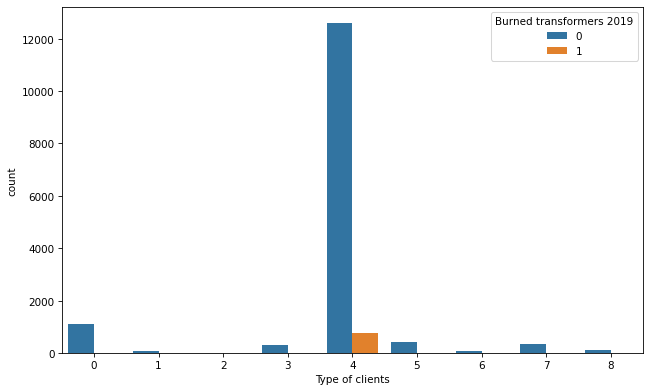

In [17]:
plt.figure(figsize=(10,6),dpi=75)
sns.countplot(data=df,x='Type of clients',hue='Burned transformers 2019')

<Axes: xlabel='Type of installation', ylabel='count'>

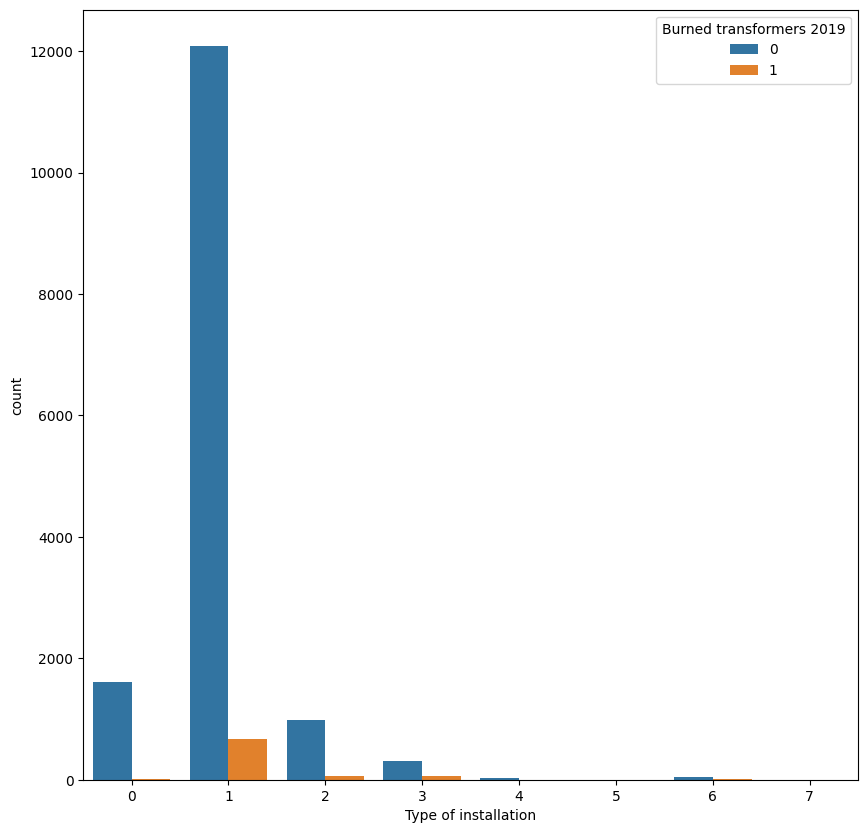

In [18]:
plt.figure(figsize=(10,10),dpi=100)
sns.countplot(data=df,x='Type of installation',hue='Burned transformers 2019')

In [19]:
X = df.drop('Burned transformers 2019', axis=1)

In [20]:

y = df['Burned transformers 2019']

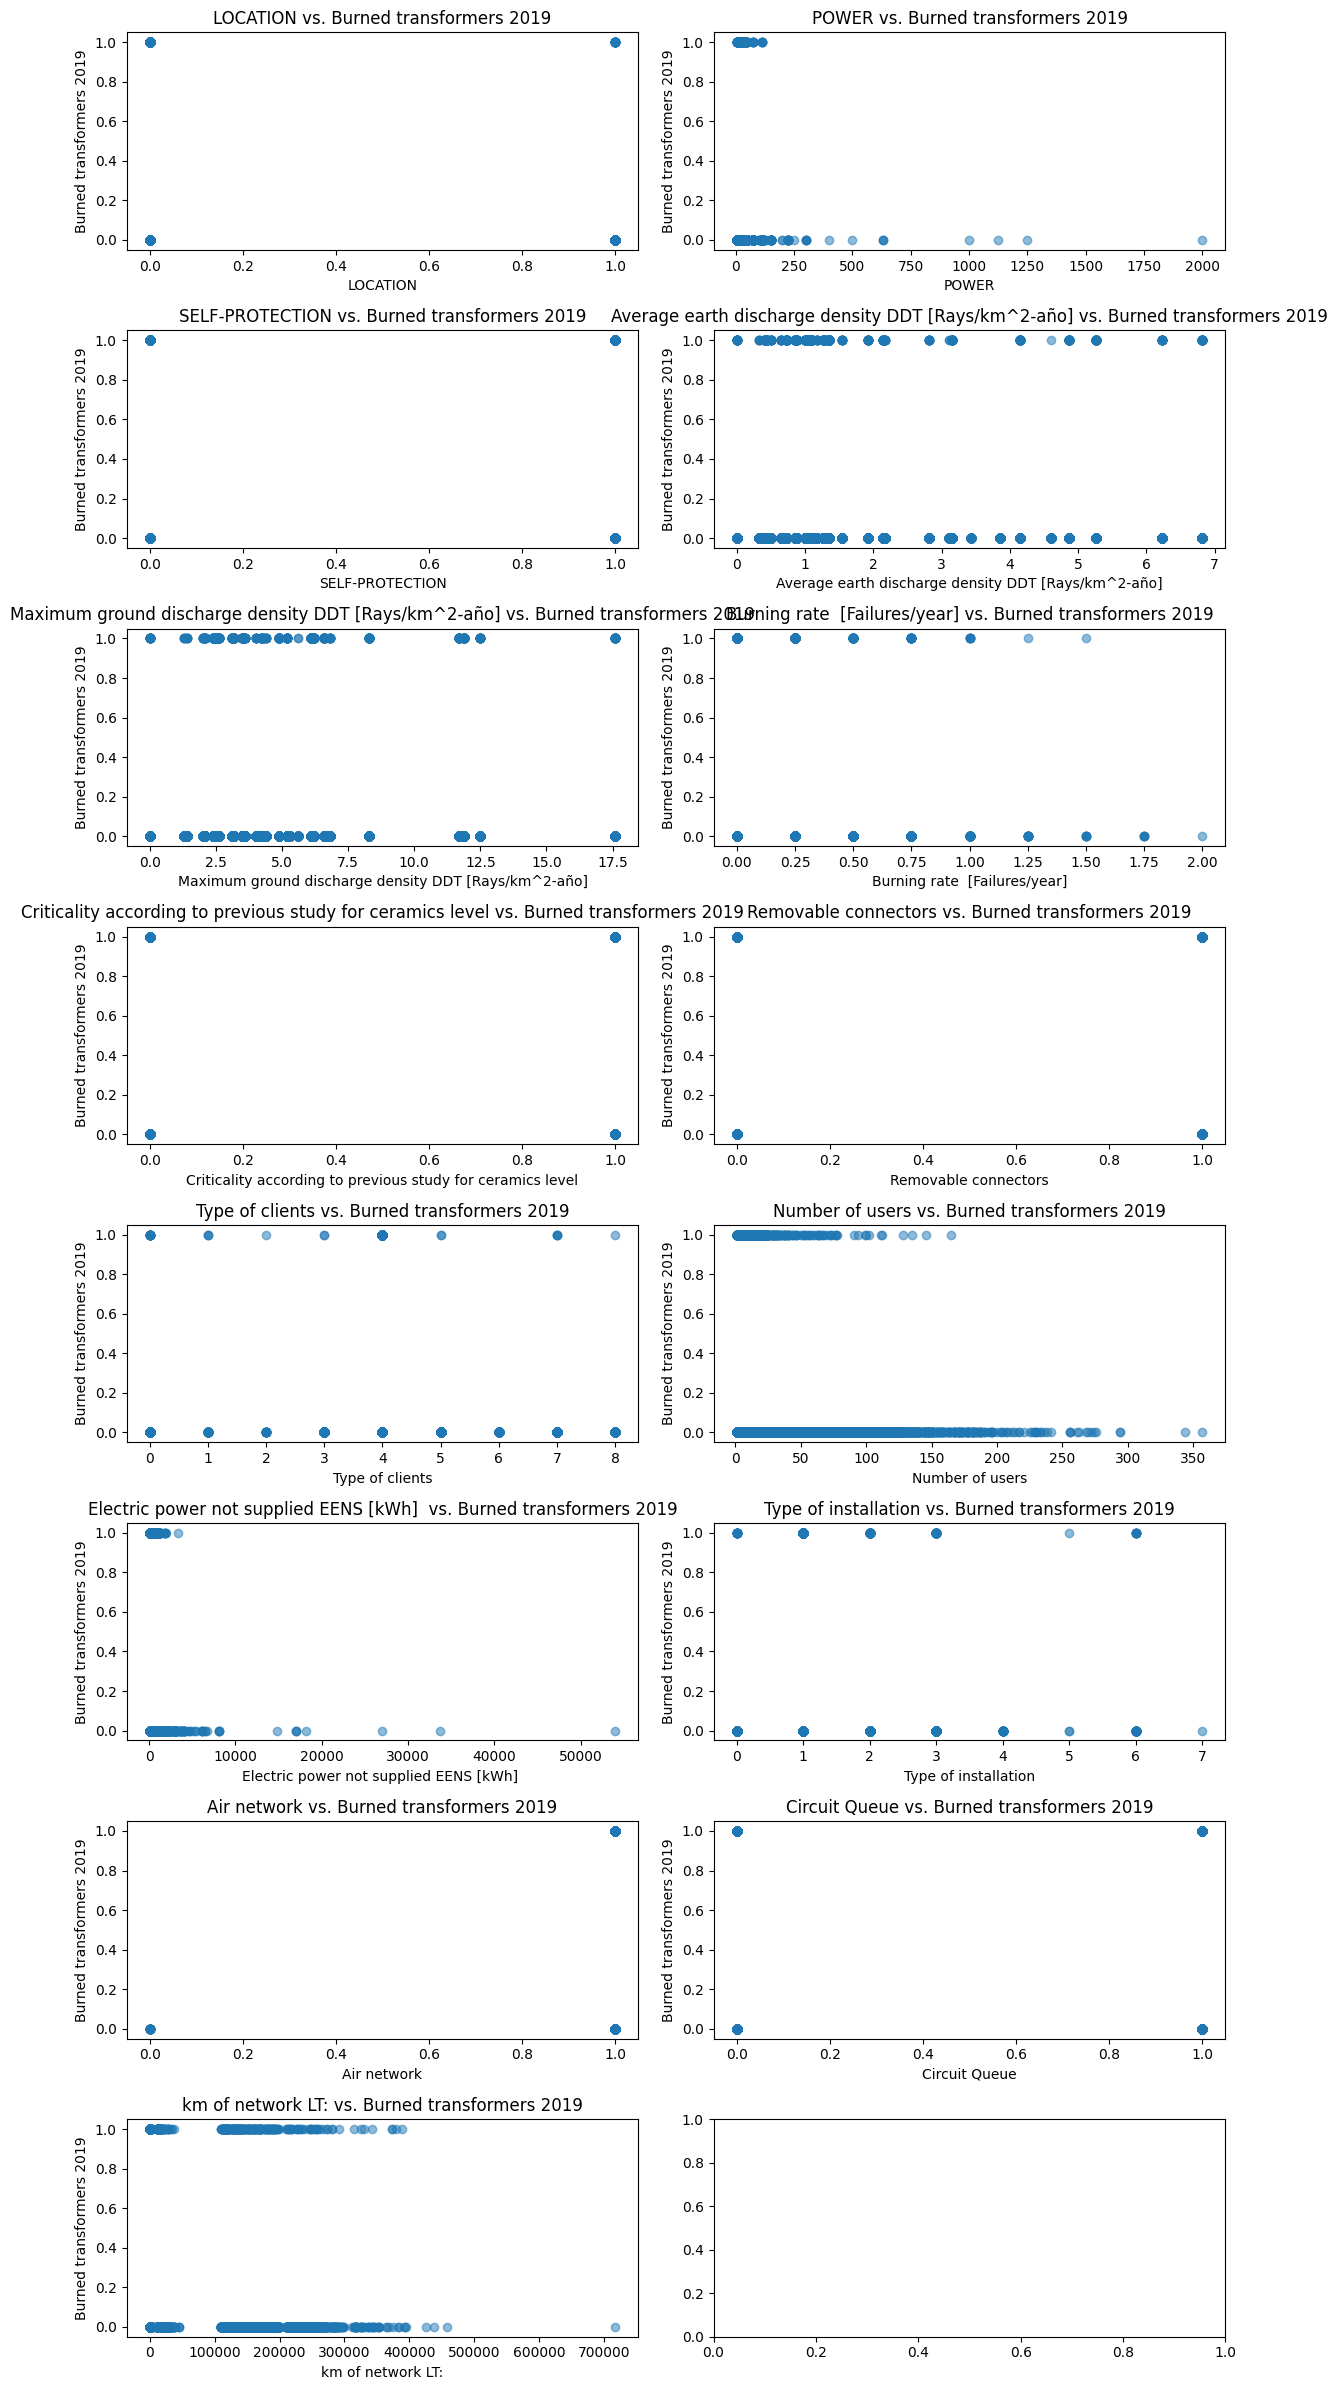

In [21]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df is your DataFrame
y = df['Burned transformers 2019']
X = df.drop('Burned transformers 2019', axis=1)

# Determine the number of subplots needed
num_features = len(X.columns)
num_subplots = min(2, num_features)  # Set a maximum of 4 subplots per row
num_rows = (num_features - 1) // num_subplots + 1

# Set the size of the subplots grid
fig, axes = plt.subplots(nrows=num_rows, ncols=num_subplots, figsize=(12, 3*num_rows))
fig.subplots_adjust(hspace=0.5)

# Flatten the axes for easy iteration
axes = axes.flatten()

# Plot each feature against the target variable
for i, column in enumerate(X.columns):
    axes[i].scatter(X[column], y, alpha=0.5)
    axes[i].set_title(f'{column} vs. Burned transformers 2019')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Burned transformers 2019')

# Adjust layout
plt.tight_layout()
plt.show()


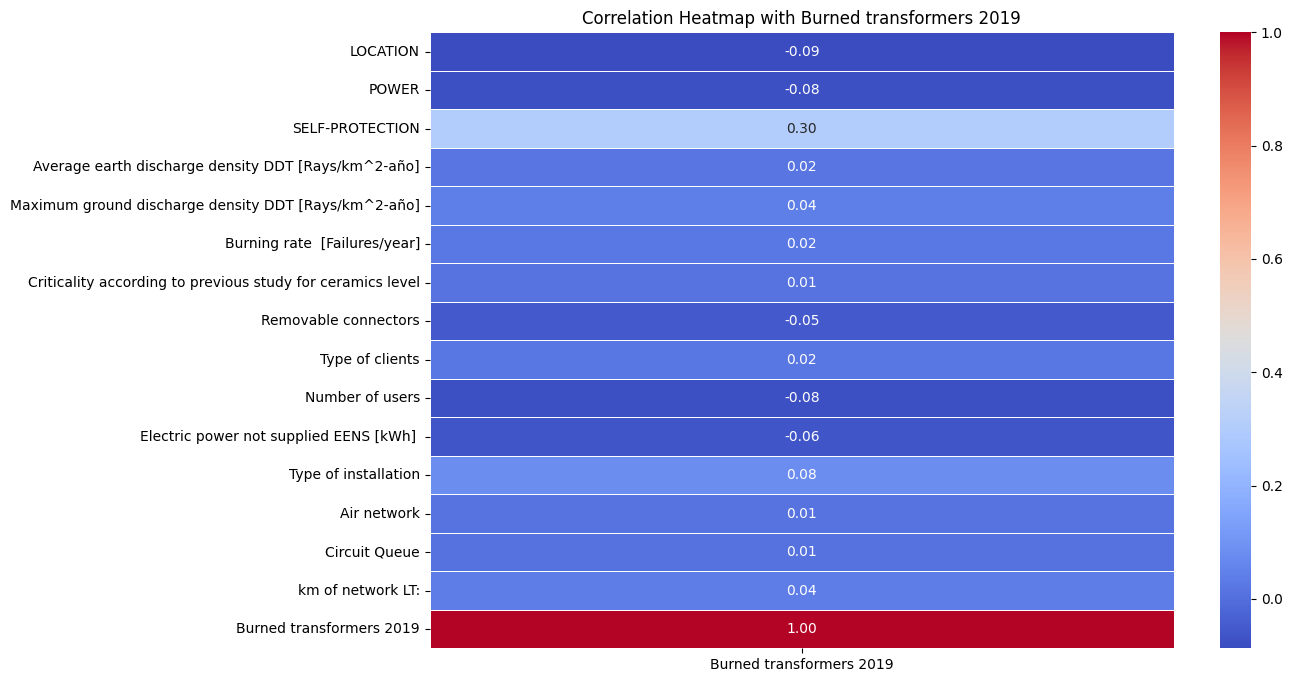

In [ ]:
data_for_corr = pd.concat([X, y], axis=1)

# Calculate the correlation matrix
corr_matrix = data_for_corr.corr()

# Set the size of the heatmap
plt.figure(figsize=(12, 8))

# Plot the heatmap
sns.heatmap(corr_matrix[['Burned transformers 2019']], annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap with Burned transformers 2019')
plt.show()

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.20,random_state=21)

In [24]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [26]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
# Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_lr = logreg.predict(X_test)

log_train = round(logreg.score(X_train, y_train) * 100, 2)
log_accuracy = round(accuracy_score(y_pred_lr, y_test) * 100, 2)

print("Training Accuracy    :",log_train ,"%")
print("Model Accuracy Score :",log_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_lr))
print("\033[1m--------------------------------------------------------\033[0m")


Training Accuracy    : 94.79 %
Model Accuracy Score : 95.12 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.95      1.00      0.97      3022
           1       0.33      0.01      0.03       153

    accuracy                           0.95      3175
   macro avg       0.64      0.51      0.50      3175
weighted avg       0.92      0.95      0.93      3175

--------------------------------------------------------


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

knn_train = round(knn.score(X_train, y_train) * 100, 2)
knn_accuracy = round(accuracy_score(y_pred_knn, y_test) * 100, 2)

print("Training Accuracy    :",knn_train ,"%")
print("Model Accuracy Score :",knn_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_knn))
print("\033[1m--------------------------------------------------------\033[0m")


Training Accuracy    : 96.03 %
Model Accuracy Score : 94.43 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.96      0.98      0.97      3022
           1       0.33      0.15      0.21       153

    accuracy                           0.94      3175
   macro avg       0.64      0.57      0.59      3175
weighted avg       0.93      0.94      0.93      3175

--------------------------------------------------------


In [27]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
decision = DecisionTreeClassifier()
decision.fit(X_train, y_train)
y_pred_dec = decision.predict(X_test)

decision_train = round(decision.score(X_train, y_train) * 100, 2)
decision_accuracy = round(accuracy_score(y_pred_dec, y_test) * 100, 2)

print("Training Accuracy    :",decision_train ,"%")
print("Model Accuracy Score :",decision_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_dec))
print("\033[1m--------------------------------------------------------\033[0m")

Training Accuracy    : 99.97 %
Model Accuracy Score : 92.13 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.96      0.96      0.96      3022
           1       0.17      0.16      0.17       153

    accuracy                           0.92      3175
   macro avg       0.56      0.56      0.56      3175
weighted avg       0.92      0.92      0.92      3175

--------------------------------------------------------


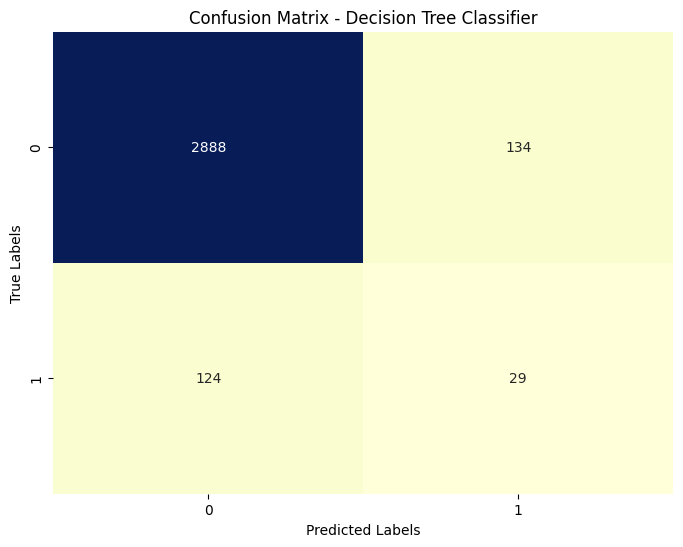

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

# Assuming y_test and y_pred_dec are already defined

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_dec)

# Plot confusion matrix with multiple colors
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu", cbar=False,
            xticklabels=decision.classes_, yticklabels=decision.classes_)
plt.title("Confusion Matrix - Decision Tree Classifier")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


In [29]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)
random_forest.score(X_train, y_train)

random_forest_train = round(random_forest.score(X_train, y_train) * 100, 2)
random_forest_accuracy = round(accuracy_score(y_pred_rf, y_test) * 100, 2)

print("Training Accuracy    :",random_forest_train ,"%")
print("Model Accuracy Score :",random_forest_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_rf))
print("\033[1m--------------------------------------------------------\033[0m")

Training Accuracy    : 99.96 %
Model Accuracy Score : 95.43 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98      3022
           1       0.64      0.12      0.20       153

    accuracy                           0.95      3175
   macro avg       0.80      0.56      0.59      3175
weighted avg       0.94      0.95      0.94      3175

--------------------------------------------------------


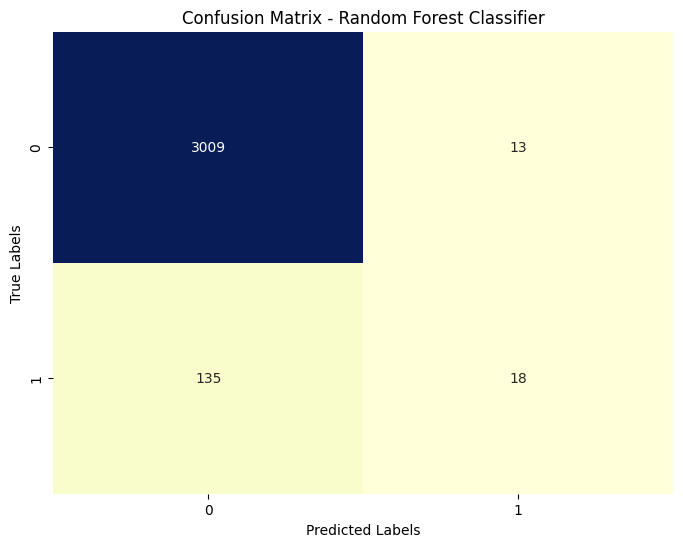

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

# Assuming y_test and y_pred_dec are already defined

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_rf)

# Plot confusion matrix with multiple colors
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu", cbar=False,
            xticklabels=decision.classes_, yticklabels=decision.classes_)
plt.title("Confusion Matrix - Random Forest Classifier")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
et = ExtraTreesClassifier(n_estimators= 100)
et.fit(X_train,y_train)
y_pred_et = et.predict(X_test)

et_train = round(et.score(X_train, y_train) * 100, 2)
et_accuracy = round(accuracy_score(y_pred_et, y_test) * 100, 2)

print("Training Accuracy    :",et_train ,"%")
print("Model Accuracy Score :",et_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_et))
print("\033[1m--------------------------------------------------------\033[0m")

Training Accuracy    : 99.98 %
Model Accuracy Score : 95.06 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.96      0.99      0.97      3022
           1       0.46      0.15      0.23       153

    accuracy                           0.95      3175
   macro avg       0.71      0.57      0.60      3175
weighted avg       0.93      0.95      0.94      3175

--------------------------------------------------------


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()
ada.fit(X_train,y_train)
y_pred_ada = ada.predict(X_test)

ada_train = round(ada.score(X_train, y_train) * 100, 2)
ada_accuracy = round(accuracy_score(y_pred_ada, y_test) * 100, 2)

print("Training Accuracy    :",ada_train ,"%")
print("Model Accuracy Score :",ada_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_ada))
print("\033[1m--------------------------------------------------------\033[0m")

Training Accuracy    : 94.79 %
Model Accuracy Score : 94.87 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.95      0.99      0.97      3022
           1       0.33      0.07      0.11       153

    accuracy                           0.95      3175
   macro avg       0.64      0.53      0.54      3175
weighted avg       0.92      0.95      0.93      3175

--------------------------------------------------------


In [ ]:
import xgboost as Xgb
xgb = Xgb.XGBClassifier()
xgb.fit(X_train,y_train)
y_pred_xgb = xgb.predict(X_test)
xgb.score(X_train, y_train)

xgb_train = round(xgb.score(X_train, y_train) * 100, 2)
xgb_accuracy = round(accuracy_score(y_pred_xgb, y_test) * 100, 2)

print("Training Accuracy    :",xgb_train ,"%")
print("Model Accuracy Score :",xgb_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_xgb))
print("\033[1m--------------------------------------------------------\033[0m")

Training Accuracy    : 97.89 %
Model Accuracy Score : 95.31 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.96      0.99      0.98      3022
           1       0.54      0.16      0.25       153

    accuracy                           0.95      3175
   macro avg       0.75      0.58      0.61      3175
weighted avg       0.94      0.95      0.94      3175

--------------------------------------------------------


In [ ]:
models = pd.DataFrame({
    'Model': [
        'Logistic Regression', 'KNN',
        'Decision Tree', 'Random Forest','XGBClassifier','ExtraTreesClassifier',
        'AdaBoostClassifier'
    ],
    'Training Accuracy': [
        log_train, knn_train, decision_train, random_forest_train,
        xgb_train, et_train, ada_train
    ],
    'Model Accuracy Score': [
        log_accuracy, knn_accuracy, decision_accuracy, random_forest_accuracy,
        xgb_accuracy, et_accuracy, ada_accuracy
    ]
})

In [ ]:
models['Model Accuracy Score']

0    95.12
1    94.43
2    91.87
3    95.34
4    95.31
5    95.06
6    94.87
Name: Model Accuracy Score, dtype: float64

(90.0, 100.0)

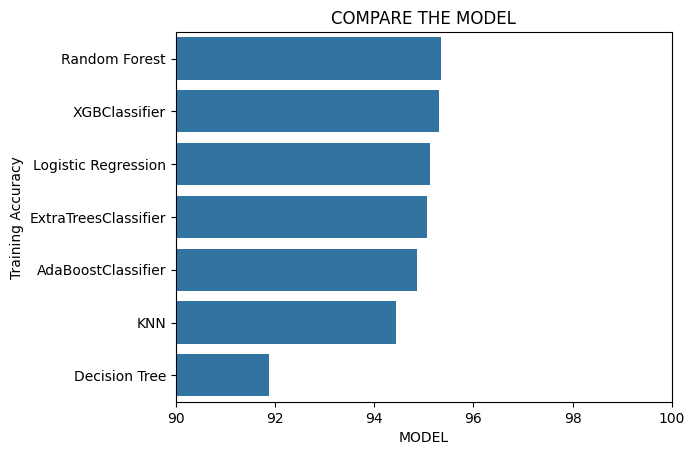

In [ ]:
models=models.sort_values(by='Model Accuracy Score',ascending=False)[:8]

sns.barplot(y= 'Model', x= 'Model Accuracy Score', data= models)
plt.title('COMPARE THE MODEL')
plt.xlabel('MODEL')
plt.ylabel('Training Accuracy');
plt.xlim(90, 100)

In [28]:
import pickle

In [30]:
with open('rf.pkl', 'wb') as files:
    pickle.dump(random_forest, files)